In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
from google.colab import files
files.upload()

Saving VOO.csv to VOO.csv
Saving VGT.csv to VGT.csv
Saving SPY.csv to SPY.csv


{'SPY.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-01-27,380.220001,380.320007,372.010010,374.410004,369.484833,123351100\n2021-01-28,376.359985,381.929993,375.890015,377.630005,372.662476,94198100\n2021-01-29,375.630005,376.670013,368.269989,370.070007,365.201935,126765100\n2021-02-01,373.720001,377.339996,370.380005,376.230011,371.280914,75817600\n2021-02-02,379.649994,383.220001,376.320007,381.549988,376.530914,64450700\n2021-02-03,382.440002,383.700012,380.480011,381.850006,376.826996,52427100\n2021-02-04,382.959991,386.239990,381.970001,386.190002,381.109863,47142600\n2021-02-05,388.200012,388.470001,386.140015,387.709991,382.609863,48669800\n2021-02-08,389.269989,390.559998,388.350006,390.510010,385.373047,38365200\n2021-02-09,389.609985,390.890015,389.170013,390.250000,385.116455,35551100\n2021-02-10,392.119995,392.279999,387.500000,390.079987,384.948700,59154400\n2021-02-11,391.239990,391.690002,388.100006,390.709991,385.570374,42913300\n2021-02-12,389.850006,392.899

In [7]:
spy = pd.read_csv('SPY.csv')
vgt = pd.read_csv('VGT.csv')
voo = pd.read_csv('VOO.csv')

In [8]:
print(spy)
print(vgt)
print(voo)

           Date        Open        High  ...       Close   Adj Close     Volume
0    2021-01-27  380.220001  380.320007  ...  374.410004  369.484833  123351100
1    2021-01-28  376.359985  381.929993  ...  377.630005  372.662476   94198100
2    2021-01-29  375.630005  376.670013  ...  370.070007  365.201935  126765100
3    2021-02-01  373.720001  377.339996  ...  376.230011  371.280914   75817600
4    2021-02-02  379.649994  383.220001  ...  381.549988  376.530914   64450700
..          ...         ...         ...  ...         ...         ...        ...
249  2022-01-21  445.559998  448.059998  ...  437.980011  437.980011  201913500
250  2022-01-24  432.029999  440.380005  ...  439.839996  439.839996  252496700
251  2022-01-25  433.059998  439.720001  ...  434.470001  434.470001  167997300
252  2022-01-26  440.720001  444.040009  ...  433.380005  433.380005  186028100
253  2022-01-27  438.260010  441.589996  ...  438.765015  438.765015   51895826

[254 rows x 7 columns]
           Date 

In [9]:
df = pd.DataFrame()
df['Date'] = spy['Date']
df['SPY'] = spy['Adj Close'].values
df['VOO'] = voo['Adj Close'].values
df['VGT'] = vgt['Adj Close'].values
#Set date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,SPY,VOO,VGT
2021-01-27,2021-01-27,369.484833,339.508881,355.143311
2021-01-28,2021-01-28,372.662476,342.359222,357.029510
2021-01-29,2021-01-29,365.201935,335.504700,348.750031
2021-02-01,2021-02-01,371.280914,341.017883,357.506012
2021-02-02,2021-02-02,376.530914,345.919525,363.204346
...,...,...,...,...
2022-01-21,2022-01-21,437.980011,402.690002,402.429993
2022-01-24,2022-01-24,439.839996,404.369995,405.029999
2022-01-25,2022-01-25,434.470001,399.459991,395.079987
2022-01-26,2022-01-26,433.380005,398.559998,396.450012


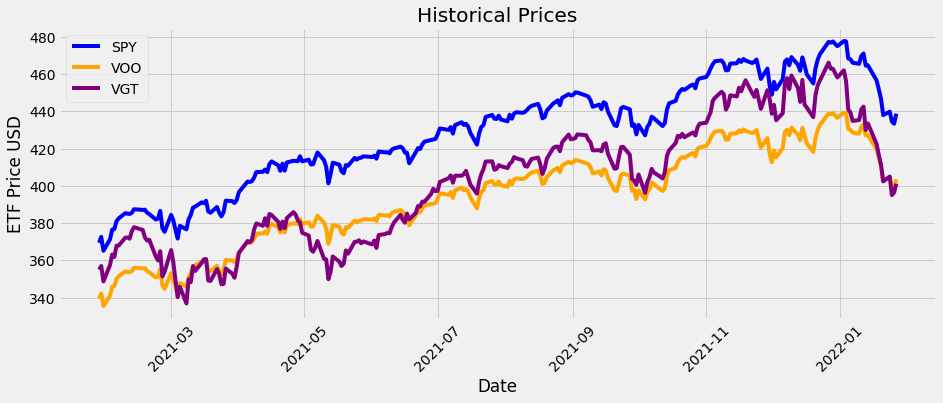

In [10]:
#plot data
plt.figure(figsize=(14,5))
plt.plot(df.index, df['SPY'], label='SPY', color='blue')
plt.plot(df.index, df['VOO'], label='VOO', color='orange')
plt.plot(df.index, df['VGT'], label='VGT', color='purple')
plt.xlabel('Date')
plt.ylabel('ETF Price USD')
plt.legend()
plt.title('Historical Prices')
plt.xticks(rotation=45)
plt.show()

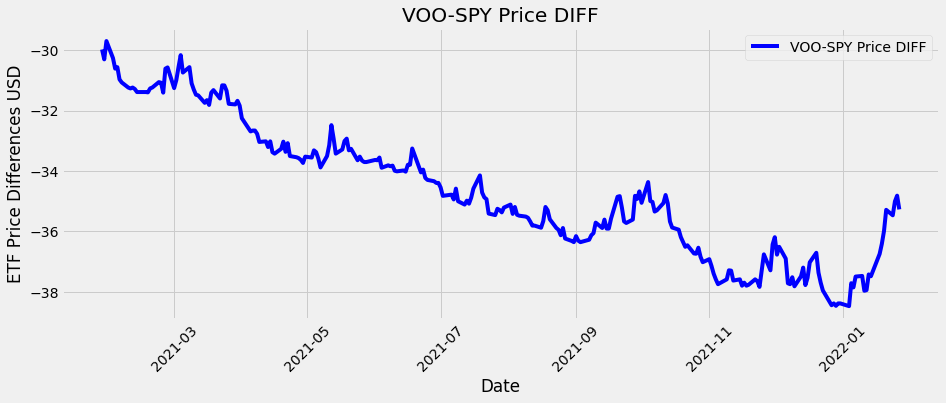

In [11]:
df['VOO-SPY Price DIFF']= df['VOO'] - df['SPY']
#plot data
plt.figure(figsize=(14,5))
plt.plot(df.index, df['VOO-SPY Price DIFF'], label='VOO-SPY Price DIFF', color='blue')
plt.xlabel('Date')
plt.ylabel('ETF Price Differences USD')
plt.legend()
plt.title('VOO-SPY Price DIFF')
plt.xticks(rotation=45)
plt.show()

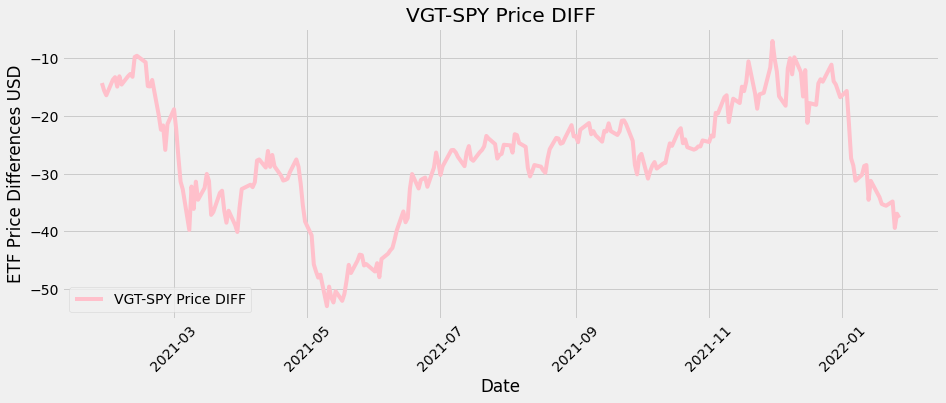

In [12]:
df['VGT-SPY Price DIFF']= df['VGT'] - df['SPY']
#plot data
plt.figure(figsize=(14,5))
plt.plot(df.index, df['VGT-SPY Price DIFF'], label='VGT-SPY Price DIFF', color='pink')
plt.xlabel('Date')
plt.ylabel('ETF Price Differences USD')
plt.legend()
plt.title('VGT-SPY Price DIFF')
plt.xticks(rotation=45)
plt.show()

In [13]:
#DAILY RETURNS
daily_simple_returns = df[['SPY', 'VOO', 'VGT']].pct_change(1)
daily_simple_returns

,SPY,VOO,VGT
2021-01-27,NaN,NaN,NaN
2021-01-28,0.008600,0.008395,0.005311
2021-01-29,-0.020020,-0.020021,-0.023190
2021-02-01,0.016646,0.016433,0.025107
2021-02-02,0.014140,0.014374,0.015939
...,...,...,...
2022-01-21,-0.019631,-0.019647,-0.021661
2022-01-24,0.004247,0.004172,0.006461
2022-01-25,-0.012209,-0.012142,-0.024566
2022-01-26,-0.002509,-0.002253,0.003468


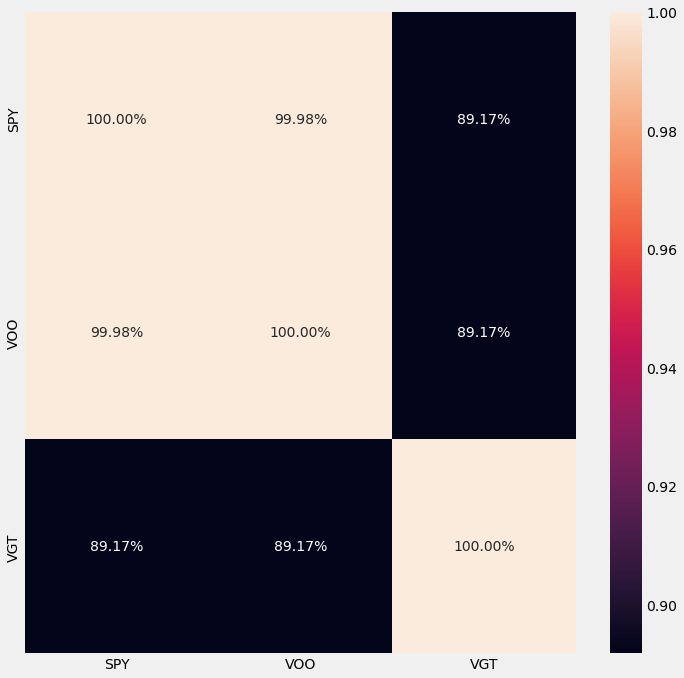

In [14]:
#CORRELATION
plt.subplots(figsize=(11,11))
sns.heatmap(daily_simple_returns.corr(), annot= True, fmt='.2%')

In [15]:
#Show covariance matrix
daily_simple_returns.cov()

,SPY,VOO,VGT
SPY,0.000069,0.000069,0.000095
VOO,0.000069,0.000068,0.000094
VGT,0.000095,0.000094,0.000163


In [16]:
#Get variance
daily_simple_returns.var()

SPY    0.000069
VOO    0.000068
VGT    0.000163
dtype: float64

In [18]:
daily_simple_returns.std() * 100

SPY    0.830503
VOO    0.827610
VGT    1.278446
dtype: float64

In [19]:
daily_simple_returns.mean()* 100

SPY    0.071388
VOO    0.071680
VGT    0.056295
dtype: float64

In [20]:
daily_simple_returns.mean() * 100 * 252

SPY    17.989855
VOO    18.063261
VGT    14.186461
dtype: float64